# Input/Output

In this tutorial, we introduce the input and output methods of proxies with `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = p2k.ProxyDatabase().from_df(df)
pdb

## Save a `ProxyRecord` to a NetCDF file

In [4]:
pdb.records['NAm_153'].to_nc('./data/NAm_153.nc')

ProxyRecord saved at: ./data/NAm_153.nc


## Save a `ProxyDatabase` to a NetCDF files

In [11]:
pdb.to_nc('./data/PAGES2k_nc')

Saving ProxyDatabase to .nc files: 100%|██████| 692/692 [00:25<00:00, 27.24it/s]

Data before 1 CE is dropped for records: ['Arc_070', 'Ant_023', 'Arc_042', 'Ocn_052', 'NAm_073', 'Ocn_004', 'Ocn_063', 'Ocn_035', 'Ocn_049', 'Ocn_029', 'Arc_043', 'NAm_019', 'Ant_018', 'Ocn_017', 'Arc_026', 'NAm_011', 'Ocn_132', 'Ocn_056', 'Ocn_009', 'Eur_017', 'Ocn_037', 'Ant_010', 'Eur_003', 'Ocn_003', 'Ant_007', 'Ant_028', 'Arc_033', 'SAm_030', 'Arc_032', 'Ocn_020', 'Arc_002', 'Ocn_002', 'Ocn_006', 'Ocn_013', 'Ocn_050', 'Aus_001', 'Ocn_041', 'Eur_018', 'Arc_020', 'Arc_040', 'Ocn_051', 'Arc_022', 'Arc_004', 'NAm_079', 'Ocn_032', 'Ocn_055', 'Arc_041', 'Eur_006', 'Ocn_030'].
ProxyDatabase saved at: ./data/PAGES2k_nc


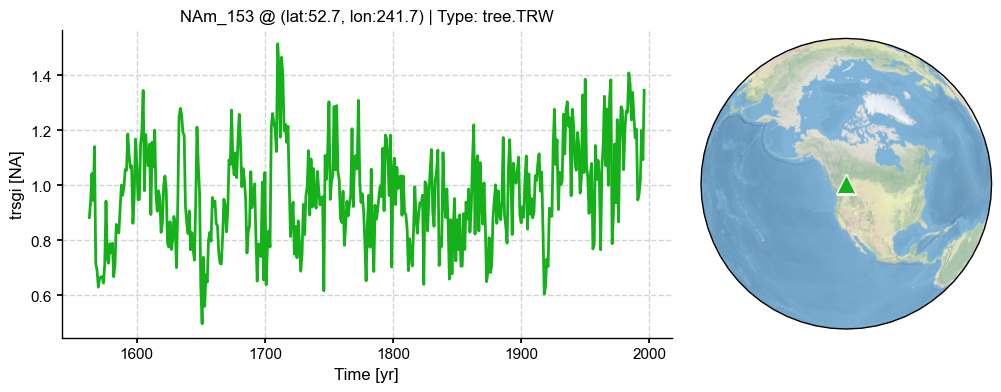

In [16]:
pobj = p2k.ProxyRecord().load_nc('./data/NAm_153.nc')
fig, ax = pobj.plot()

## Load multiple NetCDF files and save to a `ProxyDatabase`

In [74]:
pdb = p2k.ProxyDatabase().load_nc('./data/PAGES2k_nc')

Loading .nc files: 100%|██████████████████████| 692/692 [00:21<00:00, 32.83it/s]


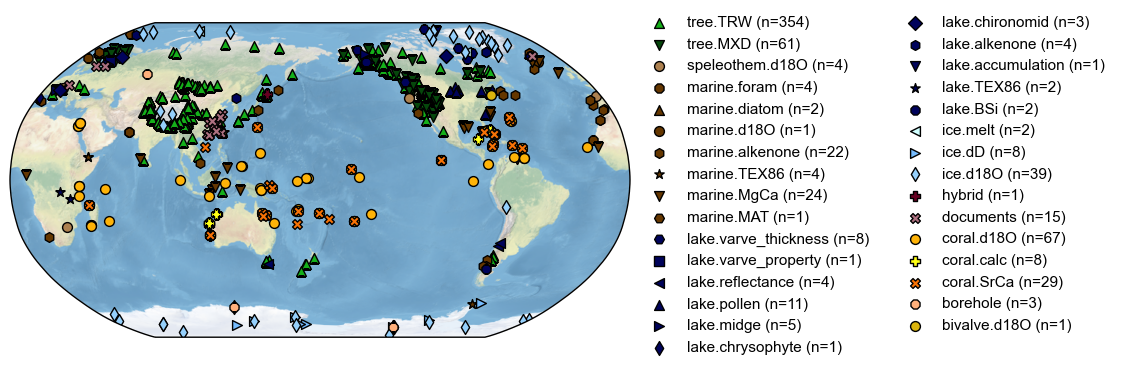

In [75]:
fig, ax = pdb.plot(plot_count=False)

This function supports multiprocessing and the default `nproc` is set to the numnber of your CPUs.
Or we may set it manually.
Below is a test of the loading speed.

In [77]:
pdb = p2k.ProxyDatabase().load_nc('./data/PAGES2k_nc', nproc=4)

Loading .nc files: 100%|██████████████████████| 692/692 [00:17<00:00, 40.22it/s]


In [78]:
pdb = p2k.ProxyDatabase().load_nc('./data/PAGES2k_nc', nproc=2)

Loading .nc files: 100%|██████████████████████| 692/692 [00:28<00:00, 24.06it/s]


In [79]:
pdb = p2k.ProxyDatabase().load_nc('./data/PAGES2k_nc', nproc=1)

Loading .nc files: 100%|██████████████████████| 692/692 [00:52<00:00, 13.09it/s]
